# DATA 601 - HW05
Due date: November 27, 2022, 23:59 pm

### Q1. (10 points)
Training and validation dataset: https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/HouseTraining.csv

* The last column of the HouseTraining.csv file lists price of 400 houses.
* There are 11 features
  * School rating (integer between 1 and 10)
  * House Area (sq ft)
  * Lot Area (sq ft)
  * Number of rooms
  * Number of bathrooms
  * Garage Yes:1, No: 0
  * Pool Yes:1, No: 0
  * Age of the House (years)
  * Walkability rating (something between 1 and 10)
  * Crime rate (something between 1 and 10)
  * Zipcode (Note that this is a fake data) 
  * House price ($)

Here are questions <br>
<b>1.1</b> Calculate the average crime rate for each zip code determine the zipcode with highest average crime rate? <br>
<b>1.2</b> Calculate the average house price for each zip code determine the zipcode with lowest average house price? Do you see a pattern? <br>
<b>1.3 </b> What feature has the strongest correlation with the "School_Rating" <br>
<b>1.4</b> Split your dataset into two (training 80\%, validation (testing) \%20, random_state=1). Build a multiple linear regression model to estimate the house price from all the other features we have and calculate the maximum relative error using $100*\mathrm{max}|(y_i-\hat{y}_i)/y_i|$ and $R^2$, where $y_i$ is the true value for the $i^{th}$ case in your testing data set and $\hat{y}_i$ is the prediction. <br>
<b>1.5</b> Download the new test dataset (https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/HouseTest.csv), guess the prices of these 10 houses featured in this dataset and print your predictions. Note that this dataset doesn't include "House_Price" column which was given in the training dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/HouseTraining.csv').drop("Unnamed: 0",axis=1)

1.1 Calculate the average crime rate for each zip code determine the zipcode with highest average crime rate?

In [3]:
data.groupby('Zipcode')['Crime_Rate'].mean().sort_values(ascending = False)

Zipcode
20140    6.511905
20174    6.368421
20119    4.610390
20182    4.500000
20104    4.283784
Name: Crime_Rate, dtype: float64

#### Zipcode with "20140" has the highst average crime rate with 6.5.

In [4]:
data.head()

,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode,House_Price
0,8,3672,7364,5.0,5.0,1.0,0.0,8,8.0,4,20104,15332000.0
1,6,1743,3893,2.0,2.0,0.0,0.0,33,5.0,8,20140,6411000.0
2,8,2242,5199,3.0,3.0,1.0,0.0,34,7.0,6,20182,8931000.0
3,8,2257,4699,3.0,3.0,0.0,1.0,42,6.0,5,20182,8662000.0
4,8,2436,5200,3.0,3.0,1.0,0.0,70,7.0,6,20182,9098000.0


1.2 Calculate the average house price for each zip code determine the zipcode with lowest average house price? Do you see a pattern?

In [29]:
data.groupby('Zipcode')['House_Price'].mean().sort_values(ascending = True)

Zipcode
20140    1.030618e+07
20174    1.063704e+07
20104    1.083254e+07
20119    1.087213e+07
20182    1.090149e+07
Name: House_Price, dtype: float64

#### - Zipcode with "20140" has the lowest house price.
#### - We can notice that the values are displayed in exponential.

1.3 What feature has the strongest correlation with the "School_Rating"

In [6]:
data.corr()

,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode,House_Price
School_Rating,1.000000,0.003273,-0.012608,0.005996,0.011234,0.016915,0.001310,-0.114875,0.373675,-0.651958,-0.402891,0.081382
House_Area,0.003273,1.000000,0.692192,0.956632,0.864089,0.126806,0.038590,0.003496,-0.001421,0.004005,0.050490,0.927668
Lot_Area,-0.012608,0.692192,1.000000,0.663507,0.628391,0.066005,0.039591,0.003279,0.041527,-0.028160,0.020762,0.875865
Room_No,0.005996,0.956632,0.663507,1.000000,0.899354,0.160627,0.058216,-0.012671,0.022116,-0.007340,0.018870,0.892501
Bath_No,0.011234,0.864089,0.628391,0.899354,1.000000,0.126592,0.054423,-0.001166,0.006643,-0.015384,-0.007733,0.816760
Garage,0.016915,0.126806,0.066005,0.160627,0.126592,1.000000,-0.003750,-0.048396,0.021130,-0.028996,-0.075111,0.124467
Pool,0.001310,0.038590,0.039591,0.058216,0.054423,-0.003750,1.000000,-0.003237,-0.052538,-0.014438,-0.014279,0.057346
House_Age,-0.114875,0.003496,0.003279,-0.012671,-0.001166,-0.048396,-0.003237,1.000000,-0.087509,0.065937,0.102555,-0.016291
Walkability,0.373675,-0.001421,0.041527,0.022116,0.006643,0.021130,-0.052538,-0.087509,1.000000,-0.597465,-0.191964,0.099872
Crime_Rate,-0.651958,0.004005,-0.028160,-0.007340,-0.015384,-0.028996,-0.014438,0.065937,-0.597465,1.000000,0.270189,-0.142806


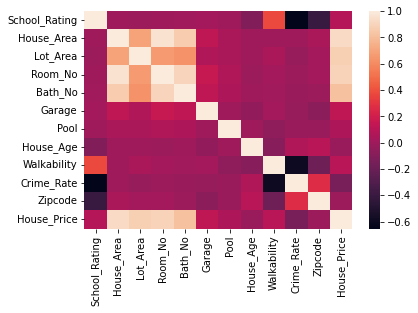

In [7]:
sns.heatmap(data.corr());

##### "Walkability" feature has the strongest correlation with the "School_Rating"

1.4 Split your dataset into two (training 80%, validation (testing) %20, random_state=1). Build a multiple linear regression model to estimate the house price from all the other features we have and calculate the maximum relative error using  100∗max|(𝑦𝑖−𝑦̂ 𝑖)/𝑦𝑖|  and  𝑅2 , where  𝑦𝑖  is the true value for the  𝑖𝑡ℎ  case in your testing data set and  𝑦̂ 𝑖  is the prediction.

In [8]:
X = data.drop('House_Price', axis=1)
Y = data['House_Price']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

In [10]:
print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 320
Test samples: 80


In [11]:
# Linear Regression model fitting.
model = LinearRegression()
model.fit(X_train, Y_train)
y_test_predict = model.predict(X_test)

# model evaluation
max_relative_error = np.amax(np.absolute(Y_test-y_test_predict)/(np.amax(Y_test)-np.amin(Y_test)))
print('max_relative_error :', 100*max_relative_error)
r2 = r2_score(Y_test, y_test_predict)
print(f'r2 : {r2}')

max_relative_error : 8.64644433790021
r2 : 0.9774507111556616


1.5 Download the new test dataset (https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/HouseTest.csv), guess the prices of these 10 houses featured in this dataset and print your predictions. Note that this dataset doesn't include "House_Price" column which was given in the training dataset.

In [12]:
house_price_predict = pd.read_csv("https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/HouseTest.csv").drop("Unnamed: 0",axis=1)

In [13]:
house_price_predict.head()

,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode
0,8,2030,4715,3.0,2.0,1.0,1.0,48,7.0,4,20166
1,8,1739,5499,2.0,2.0,0.0,1.0,37,8.0,3,20166
2,7,3628,5689,5.0,5.0,1.0,0.0,59,6.0,4,20170
3,4,2019,5441,3.0,2.0,0.0,0.0,2,4.0,8,20124
4,9,2311,6227,3.0,3.0,1.0,0.0,17,8.0,5,20165


In [14]:
print('predicted values')
model.predict(pd.DataFrame(house_price_predict))

predicted values


array([ 8561819.44871832,  8980294.32638028, 12881526.36890044,
        8599287.43466798, 10511332.01790487, 12921742.59768683,
       10019012.08221003, 11708426.88573512, 13117137.55306435,
        6771455.75731299])

## Q2. (10 points)

The Default data set of the ISLR2 package contains data about ten thousand customers. We know the balance of their bank account, their annual income and whether they are a student. You can download the dataset here: https://github.com/simsekergun/DATA601/blob/main/2021Fall/datasets/Default.xlsx?raw=true'

Let's replace yes' and no's with 1's and 0's using the factorize() function. Note that factorize() returns two objects: a label array and an array with the unique values. We are only interested in the first object, i.e. <br>
<code>df = pd.read_excel('https://github.com/simsekergun/DATA601/blob/main/2021Fall/datasets/Default.xlsx?raw=true',index_col=[0]) </code> <br>
<code>df['default'] = df.default.factorize()[0]</code>  <br>
<code>df['student'] = df.student.factorize()[0]</code> <br>


Here the steps/questions you need to follow <br>
<b>2.1</b> Plot the histograms of the features in this dataset. What kinds of distributions do you see? <br>
<b>2.2</b> Boxplot 'default vs balance' and 'default vs income'. Which one has outliers? <br> 
<b>2.3</b> Split your dataset into two (training 80\%, validation (testing) \%20, random_state=1). Build a simple logistic regression model to predict default from balance feature only. Create the confusion matrix and calculate accuracy, sensitivity, and specificity. <br> 
<b>2.4</b> Repeat 2.3 but this time use 'balance','income', and 'student' features to predict the default with a multiple logistic regression model. Create the confusion matrix and calculate accuracy, sensitivity, and specificity.  <br>
<b>2.5</b> What does having a high sensitivity and a low specificity mean?<br>

In [15]:
#df = pd.read_excel('Default.xlsx', engine='openpyxl').drop("Unnamed: 0",axis=1)

In [16]:
df = pd.read_excel('https://github.com/simsekergun/DATA601/blob/main/2021Fall/datasets/Default.xlsx?raw=true',index_col=[0]) 
df['default'] = df.default.factorize()[0]
df['student'] = df.student.factorize()[0]

C:\Users\DELL\anaconda3\envs\GAN\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [17]:
df.head()

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


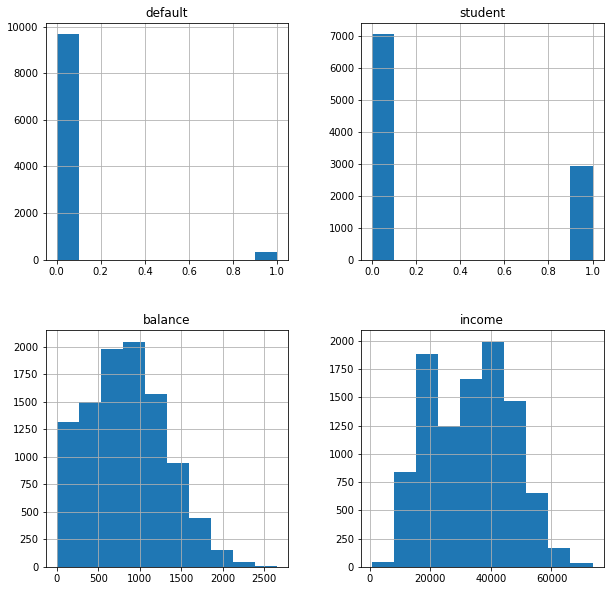

In [18]:
plt.rcParams["figure.figsize"] = (10,10)
df.hist()
plt.show()

- From the above figure we can notice that default and student features were distributed in a binary manner.
- Balance feature is negativly skewed.
- Income feature is distributed normally with two peaks.

2.2 Boxplot 'default vs balance' and 'default vs income'. Which one has outliers?

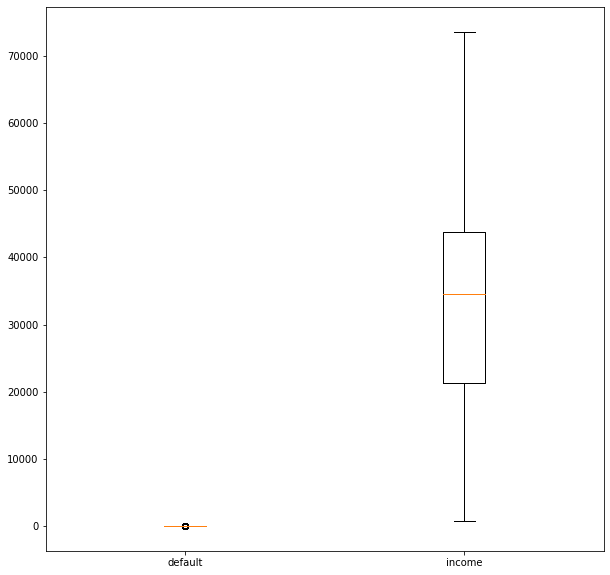

In [19]:
default = df["default"]
income = df['income']
columns = [default, income]

fig, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1, 2], ["default","income"])
plt.show()

- There are no outliers for both.

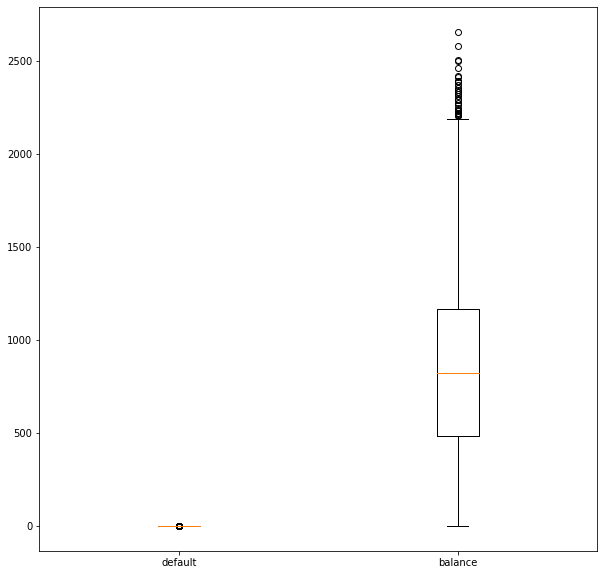

In [20]:
default = df['default']
balance = df['balance']
columns = [default, balance]

fig, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1, 2], ["default","balance"])
plt.show()

#### - We can notice from the above figure(default vs balance), balance feature has the outliers.

2.3 Split your dataset into two (training 80%, validation (testing) %20, random_state=1). Build a simple logistic regression model to predict default from balance feature only. Create the confusion matrix and calculate accuracy, sensitivity, and specificity.


In [21]:
df.head()

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


In [22]:
x = df['balance'].values.reshape(-1, 1)
y = df['default']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predict = logreg.predict(X_test)

In [24]:
# Referred from class notes.
cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1930   11]
 [  40   19]]
Accuracy :  0.9745
Sensitivity :  0.994332818134982
Specificity :  0.3220338983050847


2.4 Repeat 2.3 but this time use 'balance','income', and 'student' features to predict the default with a multiple logistic regression model. Create the confusion matrix and calculate accuracy, sensitivity, and specificity.


In [25]:
X = df.drop('default', axis=1)
Y = df['default']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predict = logreg.predict(X_test)

In [27]:
cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1930   11]
 [  40   19]]
Accuracy :  0.9745
Sensitivity :  0.994332818134982
Specificity :  0.3220338983050847


2.5 What does having a high sensitivity and a low specificity mean?

- A highly sensitive test means that there are few false negative results.
- The lower value of specificity would mean lower value of true negative and higher value of false positive.